# Part II - Solar Augmentation Potential of Fossil Fuel Plants across the Southern, Western and Central US
## by Dario Bilardello

## 
Investigation Overview
I conducted an explorative study on the solar augmentation potential of natural gas and coal plants across the southern and western United States. The augmentation may be implemented using two technologies, namely power tower and the parabolic trough.

The main outcomes of my previous investigations are:
- there are more natural gas plants than coal plants in the study;
- natural gas plants have a bimodal distribution of capacity;
- coal plants have a unimodal distribution of capacity, and reach higher capacities overall;
- power tower is a more effective solar enhancement technology than parabolic trough (as also concluded by the original study);
- the two augmentation technologies correlate strongly with fossil fuel type;
- coal plants yiel the most solar augmentation compared to natural gas plants;
- certain states stand out in terms of solar enhancement potential:
  - Arizona has the most Excellent augmentation potential, yet not necessarily in terms of total augmented capacity;
  - Texas has the largest total augmentation potential capacity, but the plantsthere rank lower (Good and Fair);
- considering that from the initial study, solar augmentation has the largest pollution control benefits on coal plants and the overall larger augmented capacity of coal plants, it makes sense to invest in augmenting these plants, including those that rank Good and Fair but produce large volumes of power. On the other hand, both coal and natural gas plants that scored Excellent augmentation potential should be "invested on", with Arizona being the poster-child state for it.


## Dataset Overview and Executive Summary

The dataset used here is the merged and cleaned dataset generated from the exploratory study containing the plant information (name and locality data), the type of fossil fuel sources for the plant, the solar augmentation potential rank determined from the original study, the augmentation technology and the augmented capacities in MWe.

In this explanatory study, I will create key visuals to highlight:
- the augmentation capacities that can be obtained using the different technologies on the different fossil fuels, demonostrating that power tower on coal generates the largest augmented capacities;
- a clean break-down by state of what the augmentation potential is by fossil fuel type;
- a map of the US where for each state I plot up to three plants with the largest augmentation potential for both coal and natural gas.


The shape files to create the map were downloaded manually from https://www.naturalearthdata.com/

All visualizations were generated using colorblind concerns and other best practices. 

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
# load in the dataset into a pandas dataframe
df=pd.read_csv('melted_plants_data.csv')
df.head(3)

,Site Name,State,Lat,Lon,Type,Solar-Augment Potential,Augment Technology Type,Augmented Capacity (MWe)
0,TS Power Plant,NV,40.6422,-116.9370,Coal,Good,Max Tower Capacity (MWe),64.7
1,Desert Rock,NM,36.5435,-108.2235,Coal,Good,Max Tower Capacity (MWe),169.2
2,Oak Grove Project,TX,31.0494,-96.4813,Coal,Good,Max Tower Capacity (MWe),484.4


## (Visualization 1)

The first visualization combines solar augmentation capacity data for coal and natural gas plants, subdivided among the solar augmentation rankings. This is intended as a one for all summary that demonstrates the effectiveness of one solar augmentation technology over the other an in particular for which fossil fuel types it works best. 

The graph also correlates the augmentation capacity with augmentation potential rank, demonstrating that many and/or large capacity plants with lower ranking may yield larger augmentation capacities overall. This is particularly useful for states such as Texas where a lot of power is produced from lower ranking plants.

The clear outcome is that solar power tower technology works best, particularly on coal plants that generate the most power AND in the Excellent rank. That said, a lot of augmentation can be generated on coal plants that rank Good and Fair, so that provided the benefits on pollution it is worth-while investing implementing the technology on the larger plants. The technology also brings appreciable, though smaller, augmentation benefits to natural gas plants, so that states with large gas plants in Excellent-Good ranks should consider investing in such augmentation.

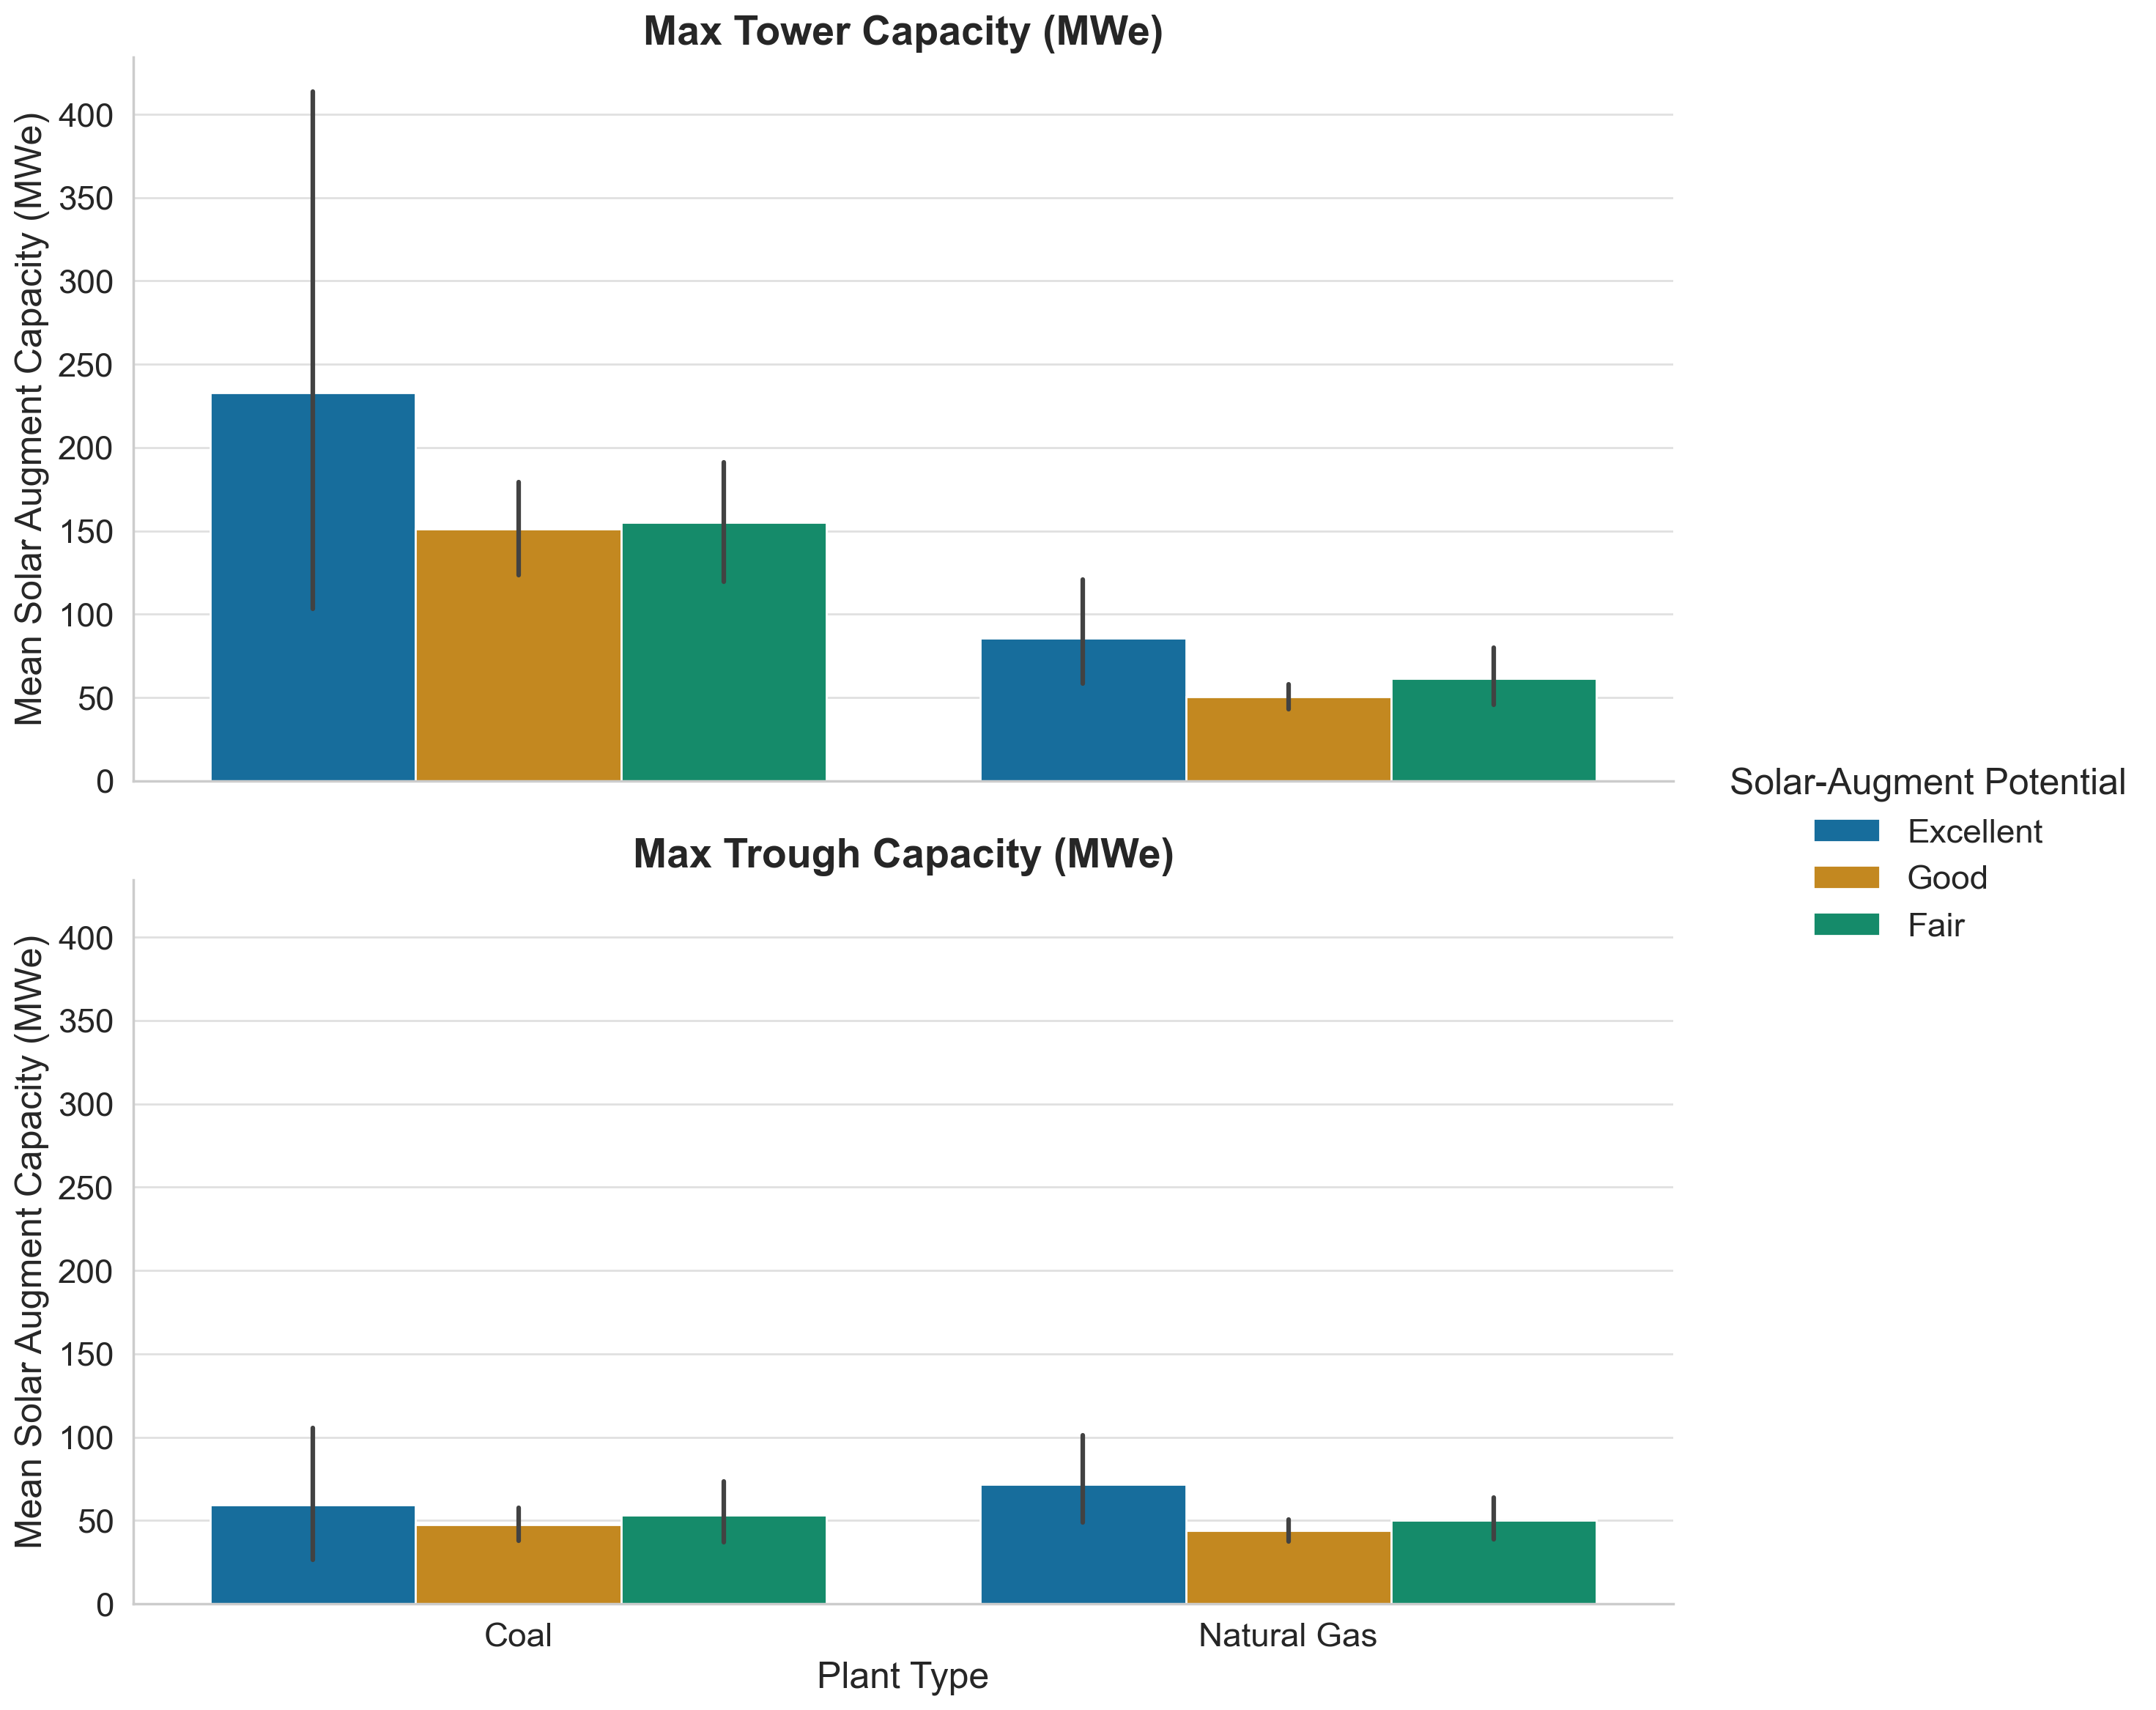

In [3]:
# Making a truly multivariable summary boxplot for the solar-augment technologies, rank and energy source

# Set publication-style aesthetics
sns.set_theme(style="white", font_scale=1.5, rc={"axes.edgecolor": ".8"})

# Define the desired order for categories
augment_order = ["Excellent", "Good", "Fair"]
custom_palette = sns.color_palette("colorblind")

# Create the facet grid with two rows (one for each capacity type)
g = sns.catplot(
    data=df, 
    x='Type', 
    y='Augmented Capacity (MWe)', 
    hue='Solar-Augment Potential',  
    hue_order=augment_order,
    kind='bar', 
    row='Augment Technology Type',# Different rows for capacity types
    height=6, 
    aspect=2,
    palette=custom_palette
)

# Adjust labels and layout
g.set_axis_labels('Plant Type', 'Mean Solar Augment Capacity (MWe)', size= 18)
g.set_titles(row_template="{row_name}", size=20, weight='bold')  # Title per row
g.tight_layout()

# Add gridlines only to the y-axis
for ax in g.axes.flat:
    ax.grid(axis='y', linestyle='-', alpha=0.6)
    
plt.show()

## (Visualization 2)

Here, I wanted to create an immediate visual of the augmentation potential of the different states involved in the study. The normalized results strengthen the rank visual across the states, highlighing the states with the most potential, yet information on the actual augmentated capacities by state is lost. This will be visualized later, including visualizing by plants.

Key immediate outcomes are:
- Arizona has the most Excellent potential for both Coal and Natural Gas, followed by New Mexico and Nevada for Natural Gas;
- Arkansas, New Mexico, South Carolina, Nevada and Utah have the most plants ranked Good for Coal, whereas Colorado, Utah and Wyoming have the most plants ranked Good for Natural Gas.

In [4]:
# Ensure the State column is sorted alphabetically
df['State'] = pd.Categorical(df['State'], categories=sorted(df['State'].unique()), ordered=True)

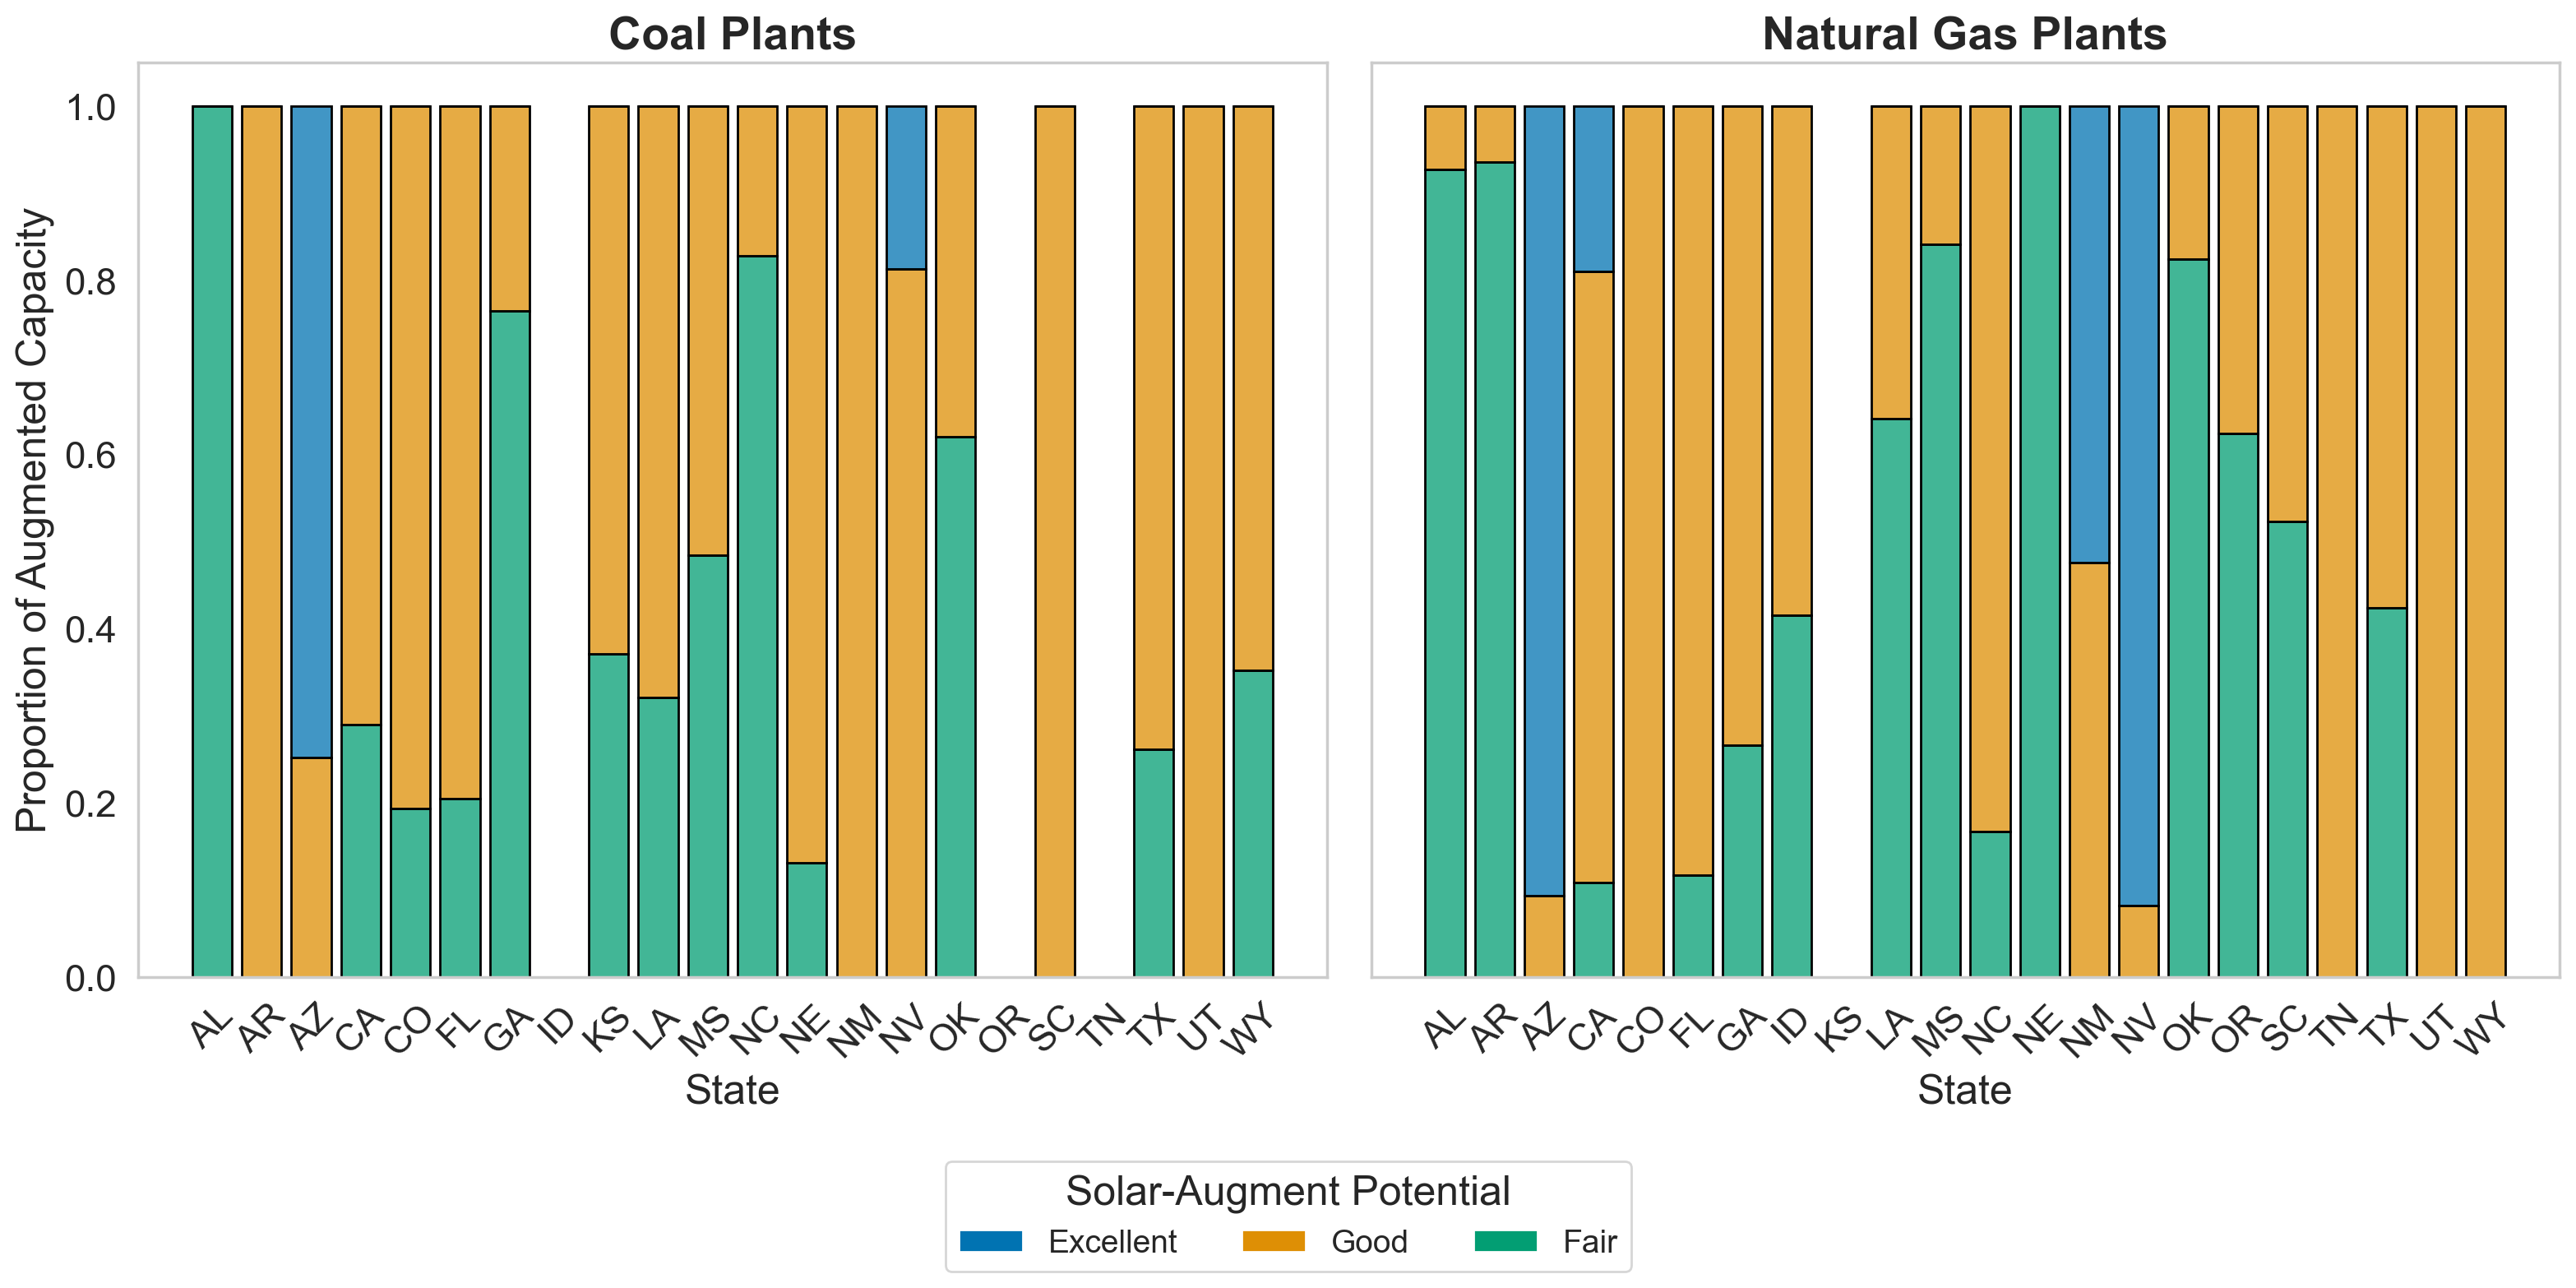

In [5]:
# Set publication-style aesthetics
sns.set_theme(style="white", font_scale=1.5, rc={"axes.edgecolor": ".8"})

# Define the desired order for categories
augment_order = ["Excellent", "Good", "Fair"]

# Custom color palette for Solar-Augment Potential categories
custom_palette = sns.color_palette("colorblind")

# Function to plot normalized stacked bars for a given plant type
def plot_normalized_stacked_chart(plant_type, ax):
    subset = df[df['Type'] == plant_type].copy()
    
    # Normalize the Augmented Capacity within each state
    subset['Normalized Capacity'] = subset.groupby('State', observed=True)['Augmented Capacity (MWe)'].transform(lambda x: x / x.sum())

    sns.histplot(
        data=subset, 
        x='State', 
        hue='Solar-Augment Potential', 
        hue_order=augment_order,
        weights='Normalized Capacity',  
        multiple='stack', 
        shrink=0.8, 
        palette=custom_palette,  
        edgecolor='black',  
        ax=ax,
        legend=False  # Suppress individual legends
    )

    ax.set_xlabel('State', size=18)
    ax.set_ylabel('Proportion of Augmented Capacity', size=18)
    ax.set_title(f'{plant_type} Plants', size=20, weight='bold')
    ax.tick_params(axis='x', rotation=45)

    
# Create separate plots for Coal and Natural Gas
fig, axes = plt.subplots(1, 2, figsize=(16, 8), sharey=True)

plot_normalized_stacked_chart('Coal', axes[0])
plot_normalized_stacked_chart('Natural Gas', axes[1])

# Manually create a legend using the color palette and category order
from matplotlib.patches import Patch

legend_labels = augment_order  # Ensure the order is consistent
legend_handles = [Patch(facecolor=color, label=label) for color, label in zip(custom_palette, legend_labels)]

# Add the custom legend below the plots
fig.legend(
    handles=legend_handles, 
    labels=legend_labels, 
    title='Solar-Augment Potential',
    loc='lower center',
    bbox_to_anchor=(0.5, -0),  # Center the legend below the figure
    ncol=len(legend_labels),  # Arrange horizontally
    frameon=True,
    fontsize=14
)

plt.tight_layout(rect=[0, 0.1, 1, 1])  # Adjust layout to fit legend
plt.show()

## (Visualization 3)

The final visual introduces spatial visualization on a map, reintroducing the actual augmentation potential of individual plants that was lost in the previous visual. For effectiveness in informing stakehoders, I have filtered the data to show the three coal and three natural gas plants in each state, if there are that many, with the largest augmentation capacities within the highest availabel augmentation potential ranks, starting from Excellent through Fair.

As a bonus, I generated a sorted dataframe/csv file that lists these filtered plans in alphabetical order by state.

In [6]:
import geopandas as gpd

# Oper the extracted shapefile
shapefile_path = "./ne_110m_admin_1_states_provinces/ne_110m_admin_1_states_provinces.shp"

# Load the shapefile
states = gpd.read_file(shapefile_path)

# Inspect the available columns
#print(states.columns)

# Filter for US states
usa_states = states[states['admin'] == 'United States of America']

# Plot to verify
#usa_states.plot();

In [7]:
# Verify the dataframe
#print(states.head(3))

In [8]:
# Plot to verify
#usa_states.plot(edgecolor='black', color='lightgrey')
#plt.show()

In [9]:
# Filter for Continental US only
usa_continental = usa_states[~usa_states['name'].isin(['Alaska', 'Hawaii'])]

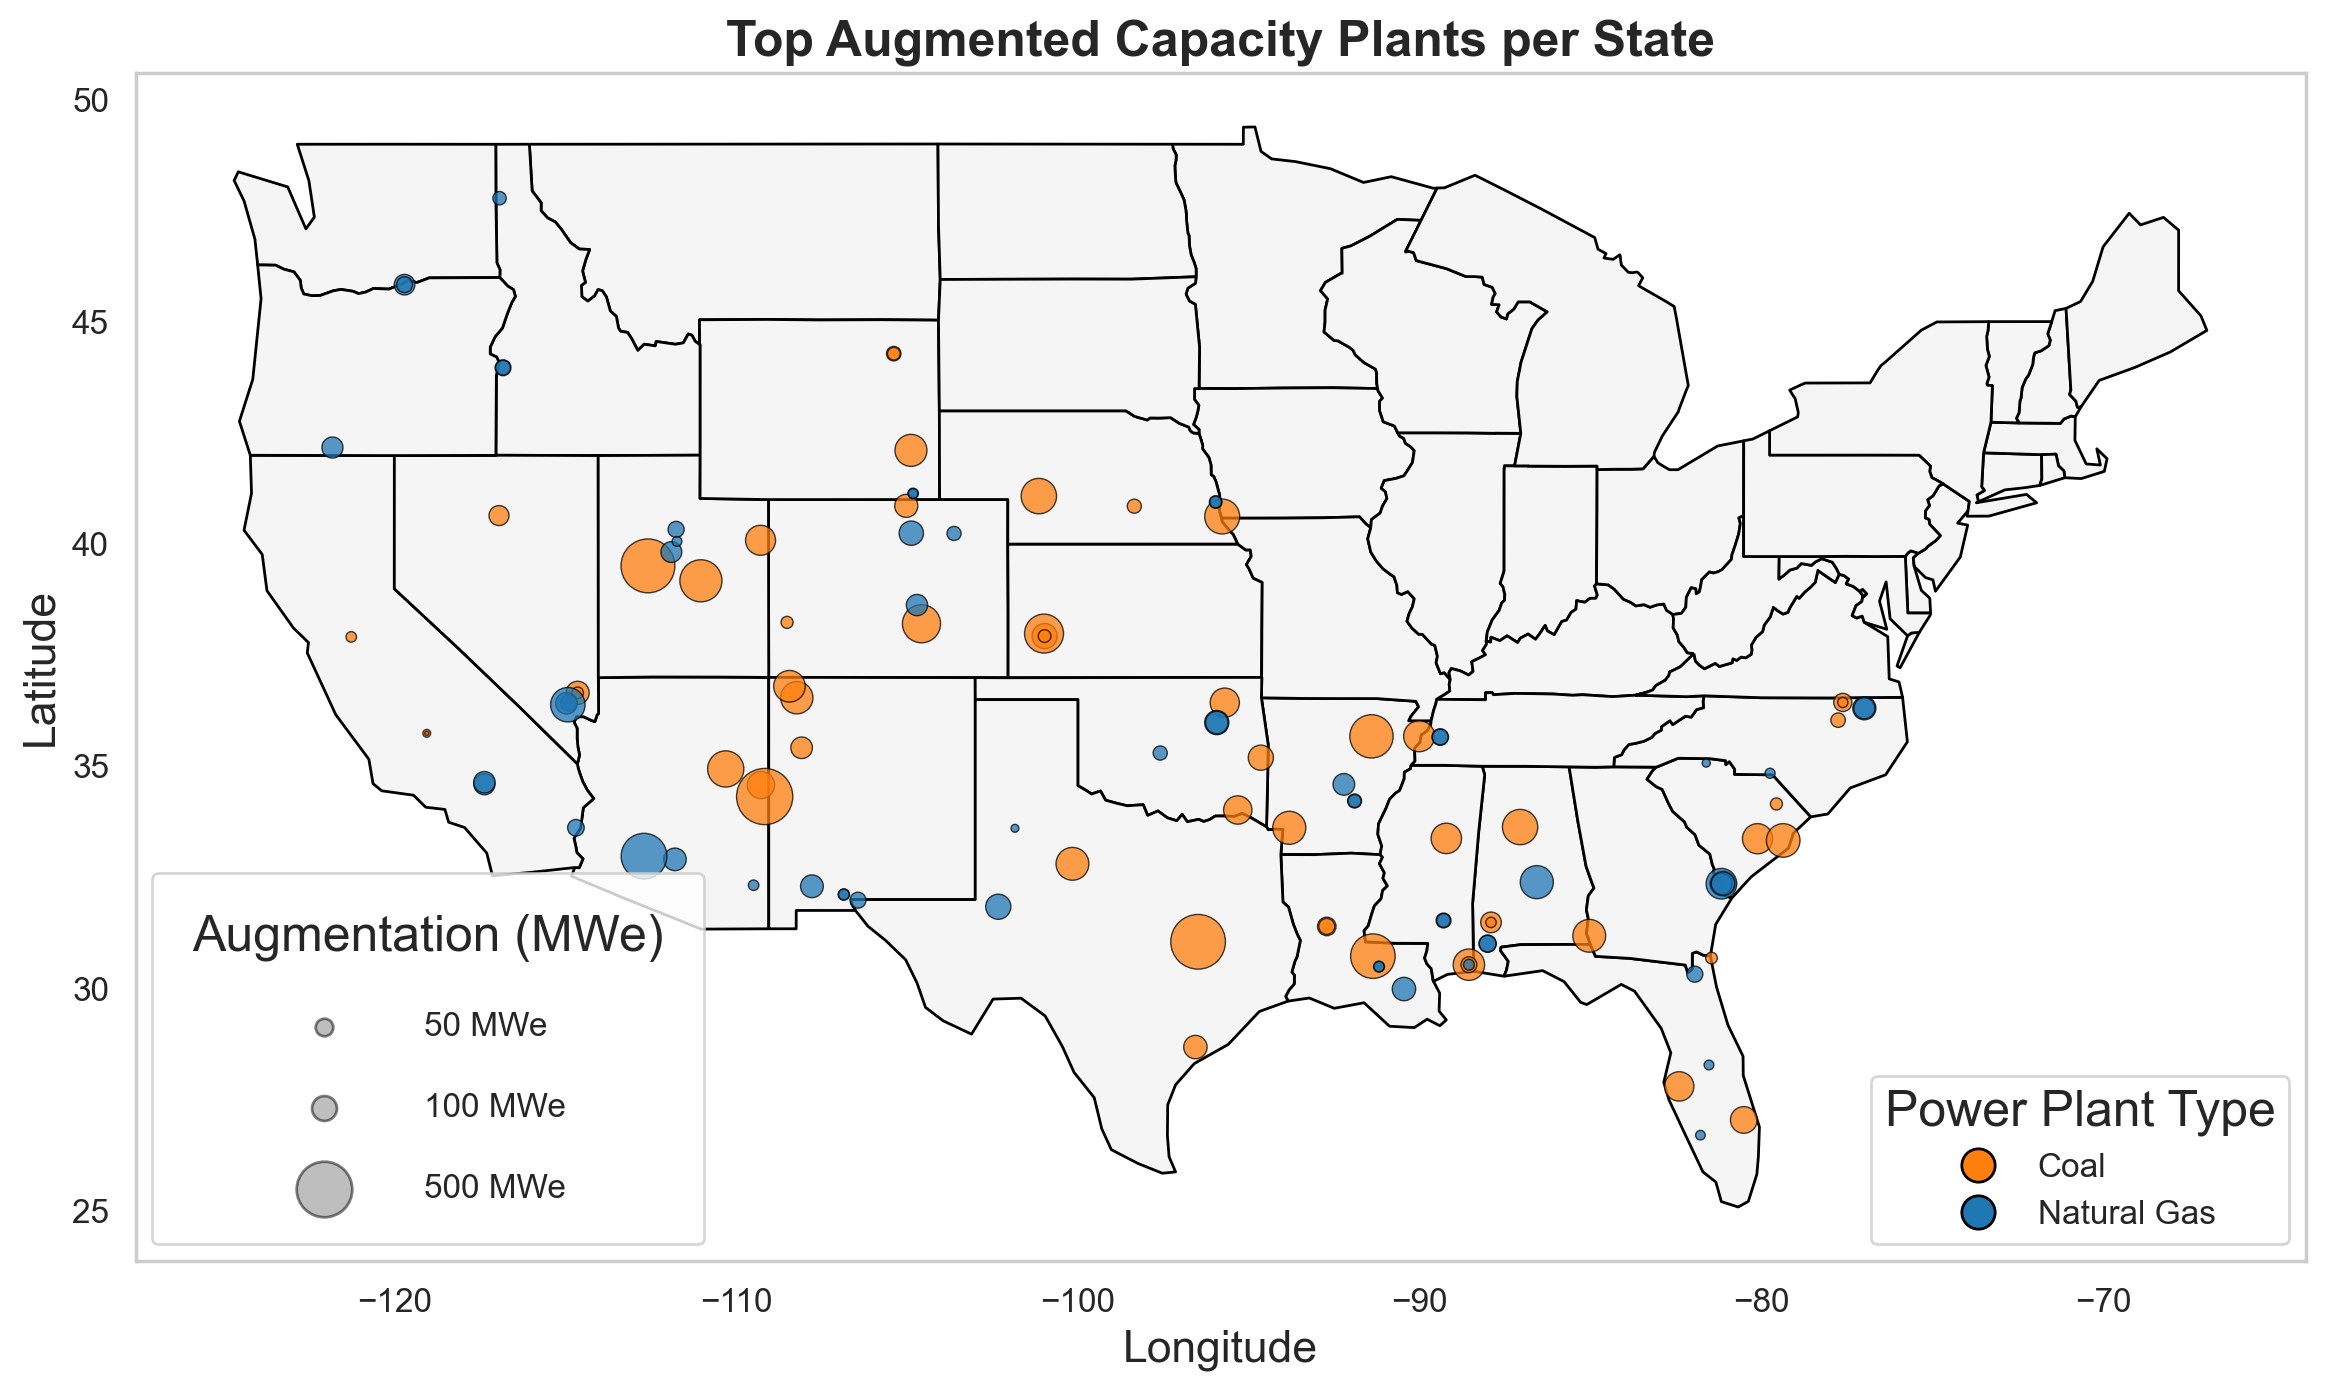

In [10]:
# Make final Explanatory Map of 3 Best Solar Augment plants per Tye per State

# Define colors for power plant types
plant_colors = {'Coal': 'tab:orange', 'Natural Gas': 'tab:blue'}


# Filter top 3 plants per state and type with prioritization
def select_top_plants(df):
    df_sorted = df.sort_values(
        by=['Solar-Augment Potential', 'Augmented Capacity (MWe)'], 
        ascending=[True, False],  # Prioritize Excellent > Good > Fair, and largest capacity first
        key=lambda col: col.map({'Excellent': 1, 'Good': 2, 'Fair': 3})  # Custom sorting for rank
    )
    return df_sorted.groupby(['State', 'Type'], as_index=False).head(3)  # Group by State and Type

filtered_df = select_top_plants(df)


# Plotting
fig, ax = plt.subplots(figsize=(14, 9))

# Plot US map
usa_continental.plot(ax=ax, color='whitesmoke', edgecolor='black', linewidth=1)

# Plot power plants with colors and size based on capacity
for plant_type in filtered_df['Type'].unique():
    subset = filtered_df[filtered_df['Type'] == plant_type]
    scatter = ax.scatter(
        subset['Lon'], 
        subset['Lat'], 
        s=subset['Augmented Capacity (MWe)'] * 0.8,  # Scale size for better visualization
        c=plant_colors[plant_type], 
        label=plant_type, 
        alpha=0.75, 
        edgecolors='black', 
        linewidth=0.5
    )


# Customize plot
plt.xlabel('Longitude', fontsize=16)
plt.ylabel('Latitude', fontsize=16)
plt.title('Top Augmented Capacity Plants per State', fontsize=18, weight='bold')
plt.grid(False)

# Tick label font size
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)

# Adjust aspect ratio for better fit
ax.set_aspect(1.3)


# Add legend for dot sizes (capacity)
size_legend = [50, 100, 500]
capacity_legend_handles = [
    plt.scatter([], [], s=size * 0.8, color='tab:gray', alpha=0.5, edgecolors='black', label=f'{size} MWe')
    for size in size_legend
]

capacity_legend = ax.legend(
    handles=capacity_legend_handles,
    title='Augmentation (MWe)',
    fontsize=12,
    loc='lower left',
    frameon=True,
    borderpad=1.2,
    labelspacing=1.5,
    handletextpad=2.0,
)

# Add power plant type legend with uniform dot sizes
from matplotlib.lines import Line2D

plant_legend_handles = [
    Line2D([0], [0], marker='o', color='w', label='Coal', 
           markersize=12, markerfacecolor='tab:orange', markeredgecolor='black'),
    Line2D([0], [0], marker='o', color='w', label='Natural Gas', 
           markersize=12, markerfacecolor='tab:blue', markeredgecolor='black')
]

type_legend = ax.legend(
    handles=plant_legend_handles,
    title="Power Plant Type",
    fontsize=12,
    loc='lower right',
    frameon=True
)

# Ensure both legends are added to the plot
ax.add_artist(capacity_legend)

# Show plot
plt.show()

In [11]:
# Make df and csv with top 3 plants per state and type

def select_top_plants_for_export(df):
    df_sorted = df.sort_values(
        by=['Solar-Augment Potential', 'Augmented Capacity (MWe)'], 
        ascending=[True, False],  # Prioritize Excellent > Good > Fair, and largest capacity first
        key=lambda col: col.map({'Excellent': 1, 'Good': 2, 'Fair': 3})  # Custom sorting for rank
    )
    return df_sorted.groupby(['State', 'Type'], as_index=False).head(3)  # Get top 3 for each type per state

# Apply filtering to get the top plants
filtered_plants_df = select_top_plants_for_export(df)

# Sort alphabetically by Plant Name and State
filtered_plants_df = filtered_plants_df.sort_values(by=['State','Site Name'])

# Save the resulting DataFrame to CSV
output_file = "top_plants_per_state.csv"
filtered_plants_df.to_csv(output_file, index=False)

### Submission
If you are using classroom workspace, you can choose from the following two ways of submission:

1. **Submit from the workspace**. Make sure you have removed the example project from the /home/workspace directory. You must submit the following files:
   - Part_I_notebook.ipynb
   - Part_I_notebook.html or pdf
   - Part_II_notebook.ipynb
   - Part_II_notebook.html or pdf


2. **Submit a zip file on the last page of this project lesson**. In this case, open the Jupyter terminal and run the command below to generate a ZIP file. 
```bash
zip -r my_project.zip .
```
The command abobve will ZIP every file present in your /home/workspace directory. Next, you can download the zip to your local, and follow the instructions on the last page of this project lesson.
